In [38]:
import pandas as pd
df = pd.read_csv('/content/college.csv')
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


In [41]:
df.describe()

,StudentID,Parent_income,IQ
count,8000.00000,8000.000000,8000.000000
mean,4000.50000,40584.017500,99.577750
std,2309.54541,18031.506468,18.923655
min,1.00000,4500.000000,60.000000
25%,2000.75000,29400.000000,90.000000
50%,4000.50000,39330.000000,100.000000
75%,6000.25000,51592.500000,110.000000
max,8000.00000,82390.000000,140.000000


In [42]:
df.isnull().sum()

,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


In [43]:
df.duplicated().sum()

np.int64(0)

In [44]:
df = df.drop_duplicates()

In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df = df.rename(columns={
    'StudentID ' : 'id_student',
    'Gender' : 'jenis_kelamin',
    'Parent_income' : 'pendapatan_ortu',
    'IQ' : 'IQ',
    'Encourage' : 'Motivasi',
    'Plan' : 'rencana',
})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   StudentID        8000 non-null   int64 
 1   jenis_kelamin    8000 non-null   object
 2   pendapatan_ortu  8000 non-null   int64 
 3   IQ               8000 non-null   int64 
 4   Motivasi         8000 non-null   object
 5   rencana          8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


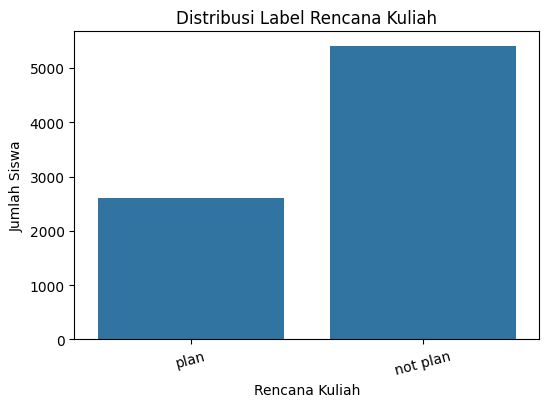

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='rencana', data=df)
plt.title('Distribusi Label Rencana Kuliah')
plt.xlabel('Rencana Kuliah')
plt.ylabel('Jumlah Siswa')
plt.xticks(rotation=15)
plt.show()


In [49]:
le = LabelEncoder()

df['jenis_kelamin'] = le.fit_transform(df['jenis_kelamin'])
df['Motivasi'] = le.fit_transform(df['Motivasi'])
df['rencana'] = le.fit_transform(df['rencana'])


In [50]:
df.head()

,StudentID,jenis_kelamin,pendapatan_ortu,IQ,Motivasi,rencana
0,4558,1,53900,118,0,1
1,4561,0,24900,87,1,0
2,4563,0,65800,93,1,0
3,4565,1,11440,117,0,1
4,4567,0,16700,102,1,0


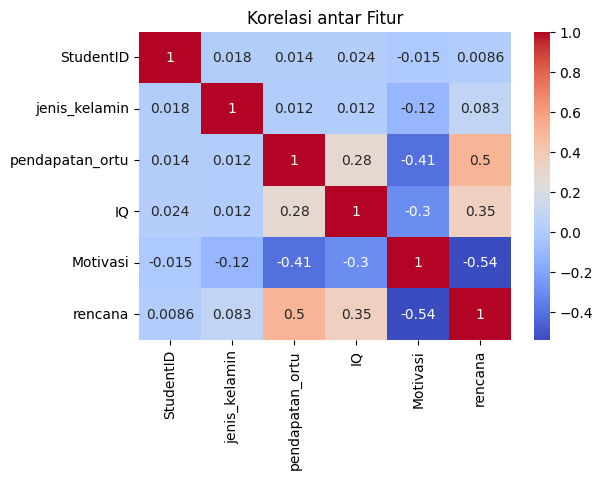

In [51]:

df_encoded = df.copy()


categorical_cols = ['jenis_kelamin', 'Motivasi', 'rencana']

label_encoder = LabelEncoder()

for col in categorical_cols:
    if col in df_encoded.columns:
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
plt.figure(figsize=(6,4))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur')
plt.show()


In [52]:

feature_cols = ['jenis_kelamin', 'pendapatan_ortu', 'IQ', 'Motivasi']
X = df[feature_cols]
y = df['rencana']


In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train),len(X_test)

(6400, 1600)

In [59]:
dt =DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [55]:
y_pred = dt.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1093
           1       0.82      0.68      0.74       507

    accuracy                           0.85      1600
   macro avg       0.84      0.80      0.82      1600
weighted avg       0.85      0.85      0.85      1600


Confusion Matrix:
[[1019   74]
 [ 164  343]]


In [56]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model: {:.2f}%".format(accuracy * 100))

Akurasi Model: 85.12%


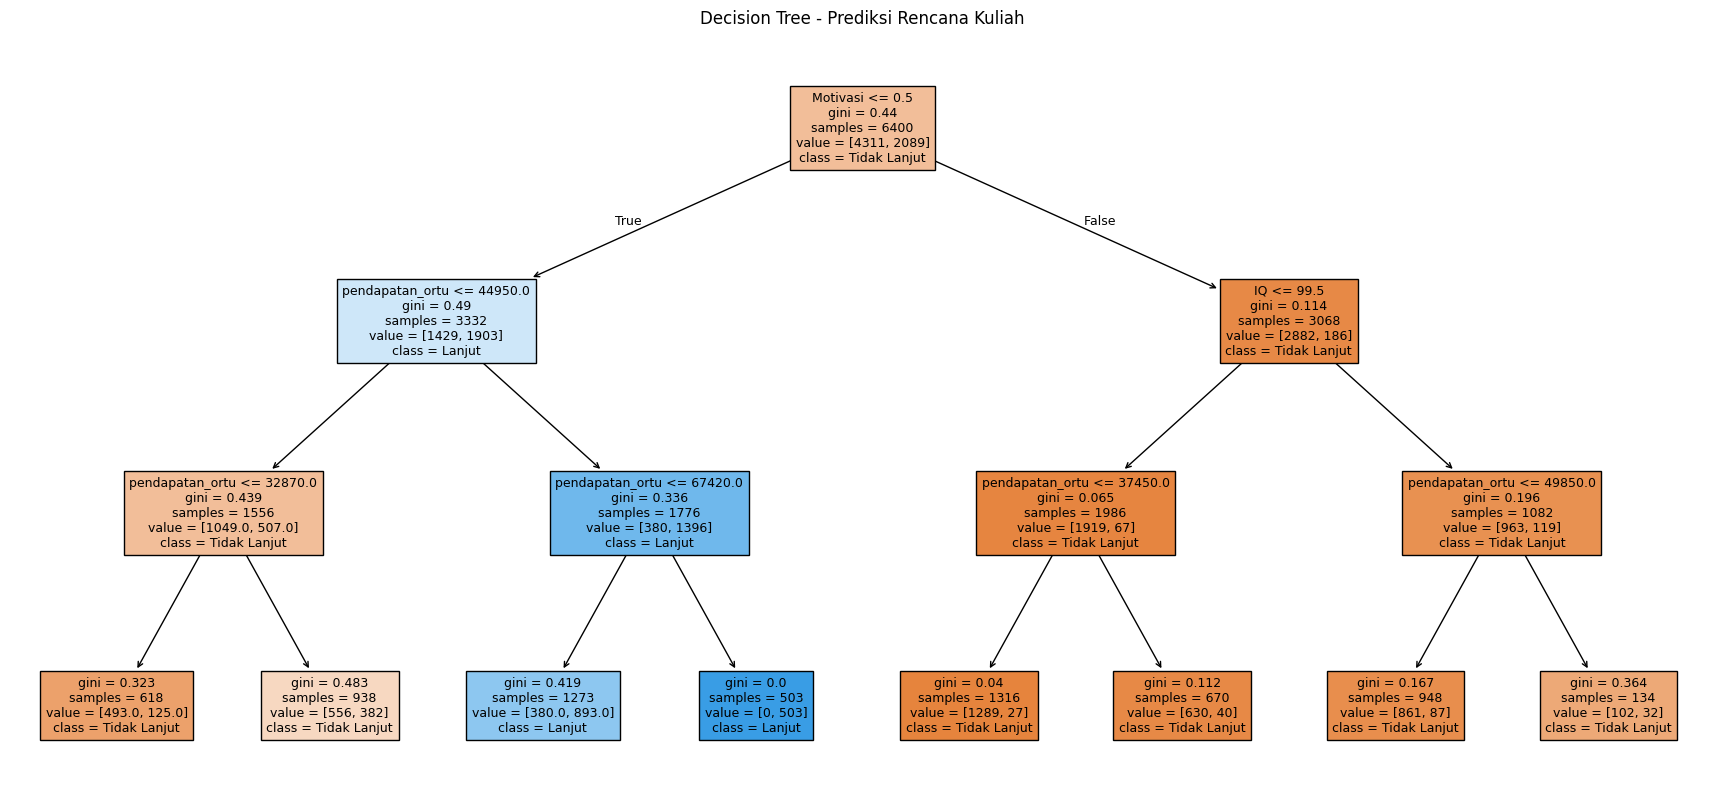

In [57]:
plt.figure(figsize=(22,10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=['Tidak Lanjut','Lanjut'],
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Prediksi Rencana Kuliah")
plt.show()


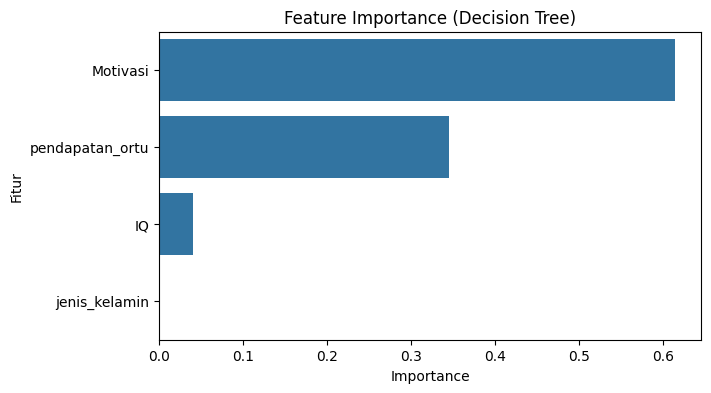

             Fitur  Importance
3         Motivasi    0.614241
1  pendapatan_ortu    0.344735
2               IQ    0.040771
0    jenis_kelamin    0.000253


In [60]:


imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.show()

imp
importance = pd.DataFrame({
    'Fitur': feature_cols,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance)
